# IST256 Project Deliverable 2 (P2)

## Phase 2: Data Exploration

In this step you should begin to explore your dataset in order to figure out what type of data story you want to tell with it. There is no "magic recipe" to follow here, you're going to need to understand your data and explore it to find something interesting. 

Throughout your exploration, you might decide that you need to enhance your dataset using an API or some other dataset. Doing this will raise the complexity of your project and ultimately improve the possible maximum grade. Your small group instructor can help you with ideas to enhance your dataset, but you're going to need to ask specific questions. The only way you can do that is to understand your data first.

### The Process

Getting to know your data takes time and research. We want you to use Python code to explore your data. Load it into a dataframe and explore and plot it. There is an expectation that you will explain what the code tells you about your data. **One more time, with feeling:** Not what the code DOES but what it tells you about your data. 

**Example**

    #CODE
    passengers['Survived'].value_counts()
    
    #OUTPUT
    Survived
    0    549
    1    342
    Name: count, dtype: int64

    # TELLS ME
    More people died than survivied
    
    
Use the common approaches we learned the after unit 10 to explore your data:

    - get `info()` on your columns: time? categorical? numerical measure? text? geographic? the Pandas / Vis readings will help here.
    - `descrivbe()` your numerical data to get a sense of the distributions
    - use `value_counts()` to get a sense of the categorical data items
    - plot the numercial data against the time, categorical data to see patters
    - plot the numberical data against each other to see a comparision
    - use histograms to get a sense of how numerical data is distributed.
    
**Advice**

This is not a one-size fits all endeavor. Again, there is no magic recipe to follow here, only good, old-fashioned exploration of your dataset of interest. For each snipped of code you write, be sure to explain what it tells you about your data, or what you learned about it. Please note not every code exploration is going to yield a compelling story, just like prospectors don't find gold or strike oil every time. Sometimes what you didn't find is just as important.

As you explore, think of what needs to happen to make your data analysis more useful or compeling. That's how you figure out ways to create a better story. For example reviews of Temu products might not be interesting, but "what they are saying" (sentiment) and "what they are saying it about" (named entities) might be. This gives you ideas for enhancing your data set! You will need these for part 2.2.
    

### 2.1 Load your dataset(s) into dataframes.

In this section load your datasets into dataframes and then `concat()` or `merge()` them into a single dataset.

Some of you might have done this already for P1.


In [10]:
# 2.1 Code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
meteorites = pd.read_csv('Meteorite_Landings.csv')

# Initial inspection
print(meteorites.head())
print(meteorites.info())

       name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3

### 2.2 Data Explorations

Explore your data. Start with the basics and work your way to smaller, curated datasets and plots, as outlined in the example above.

For each code included here, make sure to write up what the code tells you about your data / what you learned about your data from the output.

You can place this in a markdown cell under your code cell where it says: *Tells me:*

Feel free to add more cells as needed.

recclass
L6      8285
H5      7142
L5      4796
H6      4528
H4      4211
LL5     2766
LL6     2043
L4      1253
H4/5     428
CM2      416
Name: count, dtype: int64


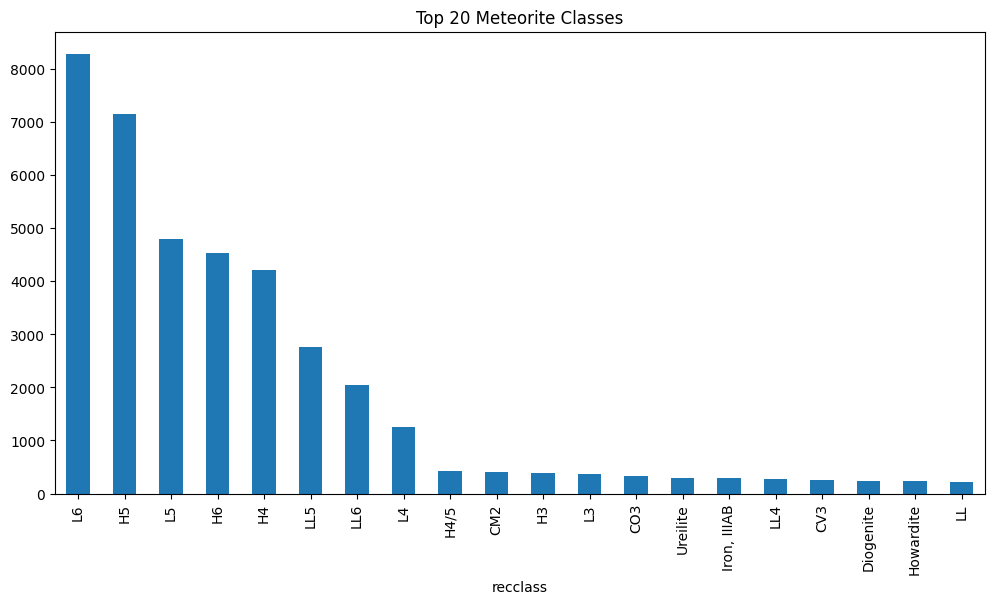

In [11]:
# CODE 
# Meteorite class distribution
class_dist = meteorites['recclass'].value_counts()
print(class_dist.head(10))

plt.figure(figsize=(12,6))
class_dist.head(20).plot(kind='bar')
plt.title('Top 20 Meteorite Classes')
plt.show()


Tells me:


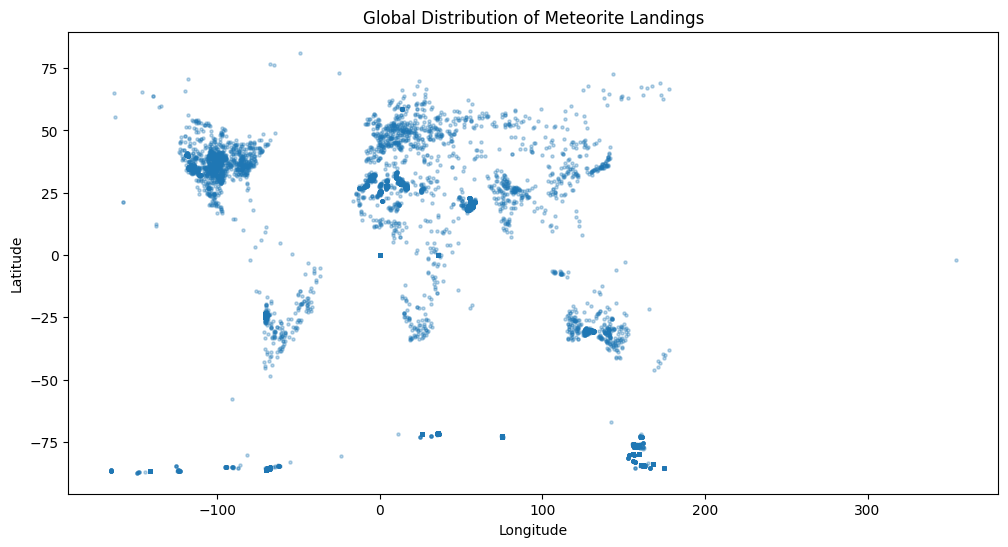

In [12]:
# CODE 
# Plotting meteorite locations
plt.figure(figsize=(12,6))
plt.scatter(meteorites['reclong'], meteorites['reclat'], alpha=0.3, s=5)
plt.title('Global Distribution of Meteorite Landings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Tells me:


count    4.558500e+04
mean     1.327808e+04
std      5.749889e+05
min      0.000000e+00
25%      7.200000e+00
50%      3.260000e+01
75%      2.026000e+02
max      6.000000e+07
Name: mass (g), dtype: float64


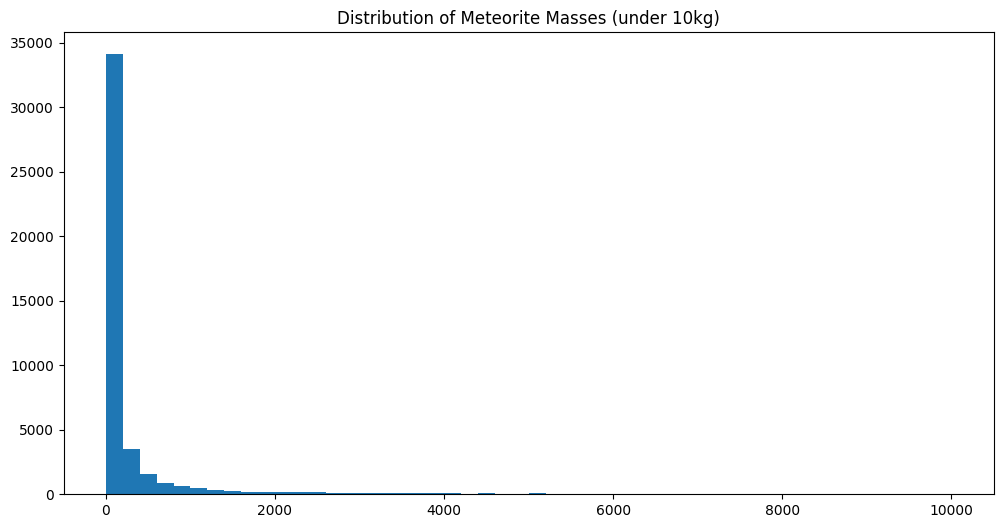

In [18]:
# CODE 
# Mass distribution analysis
print(meteorites['mass (g)'].describe())

plt.figure(figsize=(12,6))
plt.hist(meteorites['mass (g)'].dropna(), bins=50, range=(0, 10000))
plt.title('Distribution of Meteorite Masses (under 10kg)')
plt.show()

Tells me:


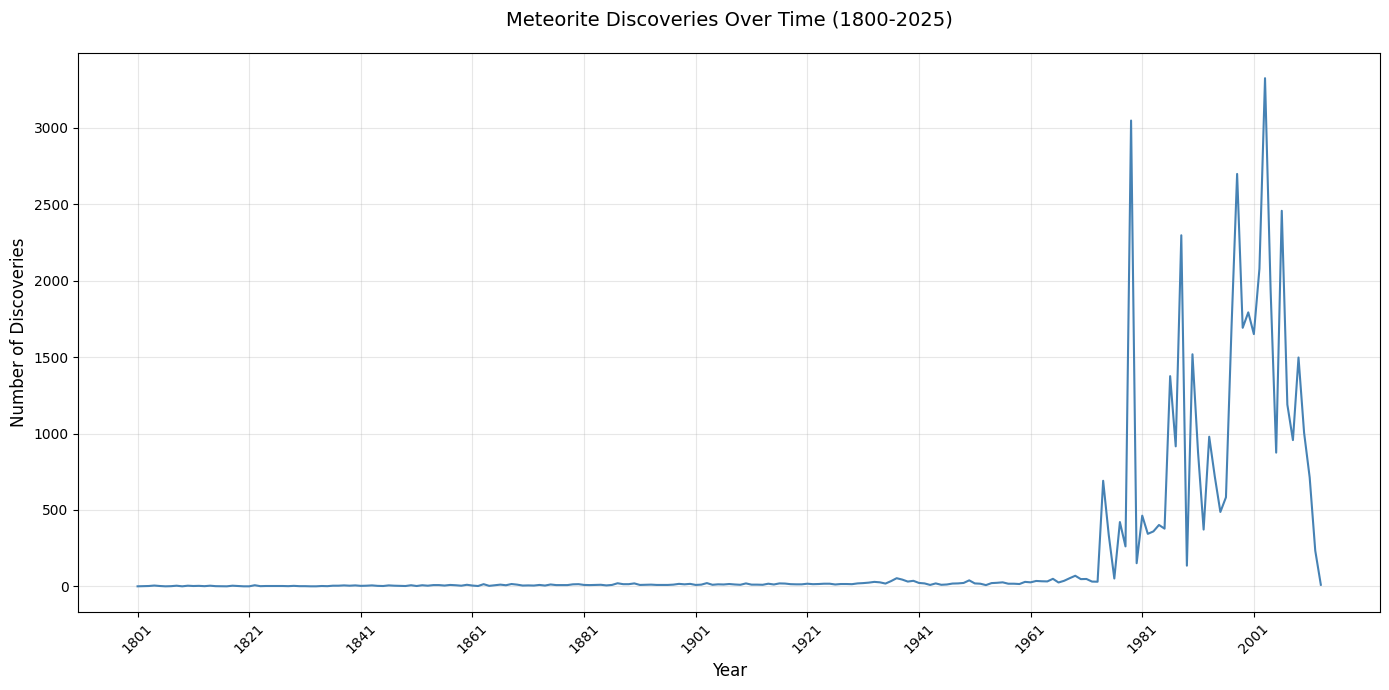

In [24]:
# CODE 
current_year = pd.Timestamp.now().year
meteorites['year'] = pd.to_numeric(meteorites['year'], errors='coerce')
valid_years = meteorites['year'].dropna()
valid_years = valid_years[(valid_years <= current_year) & (valid_years >= 1800)]  # Adjust 1800 if needed

# Count discoveries per year
discoveries_per_year = valid_years.value_counts().sort_index()

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(discoveries_per_year.index, discoveries_per_year.values, 
         color='steelblue', linewidth=1.5)

# Formatting
plt.title('Meteorite Discoveries Over Time (1800-{})'.format(current_year), 
          fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Discoveries', fontsize=12)
plt.grid(True, alpha=0.3)

# Adjust x-axis ticks to show every 20 years
xticks = range(int(discoveries_per_year.index.min()), 
               int(discoveries_per_year.index.max())+1, 20)
plt.xticks(xticks, rotation=45)

plt.tight_layout()
plt.show()

Tells me:


In [19]:
# CODE 


Tells me:


In [ ]:
# CODE 


Tells me:


In [ ]:
# CODE 


Tells me:


In [ ]:
# CODE 


Tells me:


In [ ]:
# CODE 


Tells me:


In [ ]:
# CODE 


Tells me:


In [ ]:
# CODE 


Tells me:


In [ ]:
# CODE 


Tells me:


In [ ]:
# CODE 


Tells me:


In [ ]:
# CODE 


Tells me:


### 2.3 Prepare for your Data Story

In this last step, you will prepare for the actual data story.

#### 2.3.1 Your Data Story

Based on your explorations, what is the story you plan to tell with this data and why? Make sure to justify your story based on your discoveries in 2.2. Why is it a compelling and interesting story?


Geographic Patterns: Where meteorites are most commonly found and why (discovery bias vs. actual landing patterns)
Composition Analysis: The most common types of meteorites and their geographic distribution
Temporal Trends: How discovery patterns have changed over time with advancing technology

#### 2.3.2 Enhancements

Based on your data story, come up with 1 to 3 ways your data can be enhanced to provide a better story. You might not use any of these enhancements in P3, but its useful to consider them if you are seeking a higher grade on the project and need more complexity.


1. Combine with population density data to analyze discovery bias
2. Add geological data to see if certain terrains preserve meteorites better
3. Incorporate historical events that might explain spikes in discoveries

### No Grading at This Point, Only feedback

Remember you will not recieve a grade for P2, only feedback. 

**Specific Feedback Provided:**

- Whether or not you completed this milestone to statisfaction.
- Approximate level of complexity of your project A, B or C. (Consult Syllabus)
- Suggestions / comments on next steps, including what can be done it enhance complexity.

**Things that may affect your grade:** 

- Late or unsatisfactory / inadequate submissions will affect your grade. 
- P3 projects that do not align with your P2 will affect your grade. 
- Consult the syllabus for details.

When you are ready, turn in your P2 using the submission script.

In [ ]:
# run this code to turn in your work!
from casstools.assignment import Assignment
Assignment().submit()

✅ TIMESTAMP  : 2025-05-02 00:10
✅ COURSE     : ist256
✅ TERM       : spring2025
✅ USER       : twbensho@syr.edu
✅ STUDENT    : True
✅ PATH       : ist256/spring2025/lessons/project/P2.ipynb
✅ ASSIGNMENT : P2.ipynb
✅ POINTS     : 0
✅ DUE DATE   : 2025-04-25 23:59
✅ LATE       : True
✅ STATUS     : New Submission



❓ Assignment is late. Submit? [y/n] ❓  y
